# 보스턴 지역 집값 예측

# 환경설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## 데이터 읽기 및 조회
 - `/mnt/elice/dataset` 디렉토리에 있는 `boston.csv` 파일을 읽어오세요.
 - 상위 5개 샘플(행) 조회

In [2]:
# 코드를 입력해 주세요
df = pd.read_csv('/mnt/elice/dataset/boston.csv')
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0,0.00632,18.0,2.31,NaN,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,NaN,7.07,NaN,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,NaN,7.07,NaN,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,NaN,2.18,NaN,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,NaN,2.18,NaN,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 데이터 전처리
- 컬럼별 결측치 개수를 조회하세요.

In [3]:
# 코드를 입력해 주세요
df.isna().sum()

Unnamed: 0      0
CRIM            0
ZN            372
INDUS           0
CHAS          471
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
target          0
dtype: int64

- 결측치를 0으로 대체하세요.
    - ZN : 25,000 평방피트를 초과하는 거주지역의 비율
    - CHAS : 찰스강 인접 유무

In [4]:
# 코드를 입력해 주세요
df['ZN'] = df['ZN'].fillna(0)
df['CHAS'] = df['CHAS'].fillna(0)

- Unnamed: 0 컬럼은 불필요한 컬럼이므로 제거하세요.
    - index와 동일

In [5]:
# 코드를 입력해 주세요
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


- X와 Y를 분리하세요.
    - X : target 컬럼을 제외한 나머지 컬럼
    - Y : target 컬럼

In [6]:
# 코드를 입력해 주세요
X = df.loc[:, 'CRIM':'LSTAT']
Y = df['target']

- 분리된 X를 출력하세요.

In [7]:
# 코드를 입력해 주세요
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


- 분리된 Y를 출력하세요.

In [8]:
# 코드를 입력해 주세요
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

- 분리된 X와 Y를 이용하여 Train과 Test로 분할하세요.
    - random_state는 0으로 지정하세요.

In [9]:
# 코드를 입력해 주세요
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

- LinearRegression 모델을 이용하여 학습 후 결과를 출력하세요
    - 학습 데이터와 평가 데이터의 R Squared를 출력하세요.

In [10]:
# 코드를 입력해 주세요
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.7697699488741149, 0.6354638433202118)

- StandardScaler를 사용하여 표준화를 적용하세요.
    - 부분 변환을 적용하세요.

In [11]:
# 코드를 입력해 주세요
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

- 표준화된 데이터를 이용하여 모델을 학습하고 결과를 출력하세요.

In [12]:
# 코드를 입력해 주세요
model = LinearRegression().fit(x_train_sc, y_train)
model.score(x_train_sc, y_train), model.score(x_test_sc, y_test)

(0.7697699488741149, 0.6354638433202132)

- 학습된 모델의 계수를 출력하세요.

In [13]:
# 코드를 입력해 주세요
pd.Series(model.coef_, index=X.columns).sort_values()

LSTAT     -3.590270
DIS       -3.002166
PTRATIO   -2.157438
TAX       -1.932890
NOX       -1.808769
CRIM      -0.971001
AGE       -0.198233
INDUS     -0.040448
CHAS       0.594088
B          0.751991
ZN         1.046678
RAD        2.080216
RM         2.609920
dtype: float64

- 다음의 코드를 실행하여 잔차분석을 진행하세요.
    - 빨간 실선은 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라짐을 의미 > 선형성이 없음
    - statsmodels 모듈이 없다고 에러가 발생한다면 statsmodels 모듈을 설치하세요.
    `!pip install statsmodels`

/home/kimbob/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


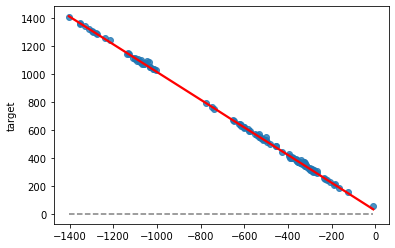

In [16]:
p_test = model.predict(x_test)
residual = y_test - p_test
sns.regplot(x=p_test, y=residual, lowess=True, line_kws={'color':'red'}) 
plt.plot([p_test.min(), p_test.max()], [0, 0], '--', color='gray')

- 다항 변환을 적용하세요.
    - 2차항으로 변환하세요.
    - 상수항은 포함하지 마세요.
    - 변환전 데이터와 변환후 데이터의 형태를 조회하세요.

In [37]:
# 코드를 입력해 주세요
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2, include_bias=False)
X_Poly = P.fit_transform(X) # X 데이터에 다항변환, 상호교차항 적용
X.shape, X_Poly.shape

((506, 13), (506, 104))

- 다항변환된 데이터를 사용하여 데이터를 분리하세요.

In [39]:
# 코드를 입력해 주세요
x_train, x_test, y_train, y_test = train_test_split(X_Poly, Y, random_state=0)

- 다항변환된 데이터를 이용하여 LinearRegression 모델을 학습 후 결과를 출력하세요
    - 학습 데이터와 평가 데이터의 R Squared를 출력하세요.

In [40]:
# 코드를 입력해 주세요
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9520519609032732, 0.6074721959691866)

- 다항변환된 데이터를 이용하여 Lasso 모델을 학습 후 결과를 출력하세요
    - 규제강도는 1을 지정하세요.
    - 학습 데이터와 평가 데이터의 R Squared를 출력하세요.
    

In [51]:
# 코드를 입력해 주세요
from sklearn.linear_model import Lasso
model = Lasso(alpha=1).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

C:\Users\BAEM1N\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.749e+03, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


(0.9068684337013593, 0.7280316827205044)

- 계수값이 0이 아닌 계수의 개수를 계산하세요.

In [52]:
# 코드를 입력해 주세요
len(model.coef_[model.coef_ != 0])

55

- 다항변환된 데이터를 이용하여 Ridge 모델을 학습 후 결과를 출력하세요
    - 규제강도는 100을 지정하세요.
    - 학습 데이터와 평가 데이터의 R Squared를 출력하세요.

In [56]:
# 코드를 입력해 주세요
from sklearn.linear_model import Ridge 
model = Ridge(alpha=100).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9315498119280992, 0.7554769845806283)

- 계수값이 0이 아닌 계수의 개수를 계산하세요.

In [57]:
# 코드를 입력해 주세요
len(model.coef_[model.coef_ != 0])

104